In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from models.ETD_KT_CM_JAX_Vectorised import ETD_KT_CM_JAX_Vectorised, KS_params, ic
from ml_collections import ConfigDict

In [2]:
params = ConfigDict(KS_params)
params.update(E=10)
print(params)

E: 10
P: 32
c_0: 0
c_1: 1
c_2: 0.1
c_3: 0.0
c_4: 0.001
dt: 0.0078125
nx: 256
tmax: 64



In [3]:
fwd_model = ETD_KT_CM_JAX_Vectorised(params)

In [4]:
initial = ic(fwd_model.x, params.E)

In [5]:
u_final, u_all = fwd_model.run(initial, 1000, None)

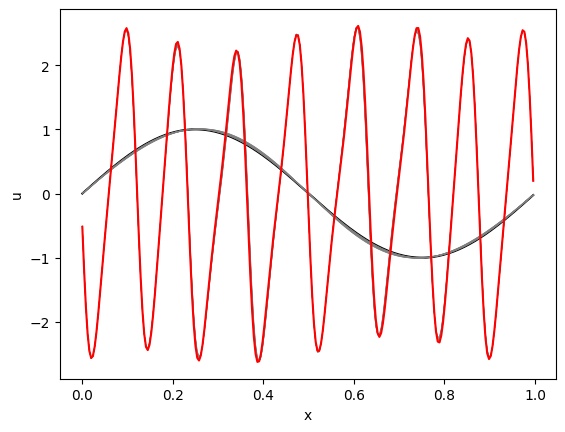

In [ ]:
plt.plot(fwd_model.x, initial[0,:].squeeze(), color = 'black')
plt.plot(fwd_model.x, u_all[-10:, 0, :].T, color='grey', linewidth=0.5)
plt.plot(fwd_model.x, u_all[:10, 0, :].T, color='grey', linewidth=0.5)
plt.plot(fwd_model.x, u_final[0,:].squeeze(), color = 'red')
plt.xlabel('x')
plt.ylabel('u')
plt.show()

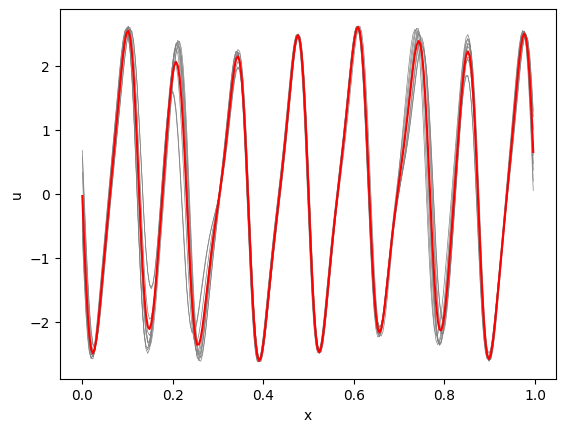

In [9]:
plt.plot(fwd_model.x, u_final[:,:].T, color='grey', linewidth=0.5)
plt.plot(fwd_model.x, u_final.mean(axis=0), color = 'red')
plt.xlabel('x')
plt.ylabel('u')
plt.show()